<a href="https://colab.research.google.com/github/UiinKim/UiinKim/blob/main/%EB%84%A4%EA%B1%B0%ED%8B%B0%EB%B8%8C_%EC%83%98%ED%94%8C%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer

In [78]:
dataset=fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents=dataset.data
print('총 샘플 수 : ', len(documents))

총 샘플 수 :  11314


In [79]:
pd.DataFrame(documents).isnull().any()
#null값은 없음

0    False
dtype: bool

In [80]:
df=pd.DataFrame({'document':documents})

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   document  11314 non-null  object
dtypes: object(1)
memory usage: 88.5+ KB


In [82]:
df['pre_document']=df['document'].str.replace('[^a-zA-Z0-9]', ' ')
df['pre_document']=df['pre_document'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) #x는 document의 각 문장이 되고 w는 문장의 띄어쓰기로 구분되는 단어들이다.
df['pre_document']=df['pre_document'].apply(lambda x: x.lower())

<ipython-input-82-acce526c67d0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['pre_document']=df['document'].str.replace('[^a-zA-Z0-9]', ' ')


In [83]:
print(df['pre_document'])

0        well sure about story seem biased what disagre...
1        yeah expect people read actually accept hard a...
2        although realize that principle your strongest...
3        notwithstanding legitimate fuss about this pro...
4        well will have change scoring playoff pool unf...
                               ...                        
11309    danny rubenstein israeli journalist will speak...
11310                                                     
11311    agree home runs clemens always memorable kinda...
11312    used deskjet with orange micros grappler syste...
11313    argument with murphy scared hell when came las...
Name: pre_document, Length: 11314, dtype: object


In [84]:
df.replace('',float('NaN'), inplace=True) #inplace는 원본데이터 변경을 True로 바꿔준다.
df.isnull().any()

document        True
pre_document    True
dtype: bool

In [85]:
df.dropna(inplace=True)
print('총 샘플 수 : ', len(df))

총 샘플 수 :  10995


In [86]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [90]:
#불용어 리스트를 사용하여 불용어 제거
stop_word=stopwords.words('english')
tokenized_word=df['pre_document'].apply(lambda x: x.split())
tokenized_word=tokenized_word.apply(lambda x: [w for w in x if not w in stop_word])
tokenized_word=tokenized_word.to_list() #배열로는 tokenized_word에서 drop_sentence를 지우는게 불가능하므로 list로 변환

In [95]:
#단어가 1개 이하인 문장을 제거
drop_sentence=[index for index, sentence in enumerate(tokenized_word) if len(sentence)<=1]
tokenized_sent=np.delete(tokenized_word, drop_sentence, axis=0)
print(len(tokenized_sent))

10942


In [120]:
#단어 집합 생성 및 정수 인코딩
tokenizer=Tokenizer()
tokenizer.fit_on_texts(tokenized_sent)
word_to_index=tokenizer.word_index
index_to_word={value : key for key, value in tokenizer.word_index.items()}
index_word=tokenizer.word_index
encoded=tokenizer.texts_to_sequences(tokenized_sent)

In [121]:
print(word_to_index)
print(encoded[:2])

{'would': 1, 'people': 2, 'like': 3, 'know': 4, 'also': 5, 'think': 6, 'time': 7, 'could': 8, 'well': 9, 'good': 10, 'even': 11, 'first': 12, 'much': 13, 'many': 14, 'make': 15, 'system': 16, 'used': 17, 'right': 18, 'file': 19, 'want': 20, 'said': 21, 'anyone': 22, 'need': 23, 'work': 24, 'something': 25, 'problem': 26, 'since': 27, 'please': 28, 'information': 29, 'year': 30, 'back': 31, 'using': 32, 'really': 33, 'program': 34, 'going': 35, 'still': 36, 'years': 37, 'find': 38, 'believe': 39, 'must': 40, 'point': 41, 'last': 42, 'available': 43, 'number': 44, 'take': 45, 'space': 46, 'data': 47, 'thanks': 48, 'things': 49, 'windows': 50, 'government': 51, 'might': 52, 'made': 53, 'another': 54, 'mail': 55, 'without': 56, 'help': 57, 'better': 58, 'sure': 59, 'read': 60, 'never': 61, 'drive': 62, 'long': 63, 'case': 64, 'look': 65, 'however': 66, 'power': 67, 'question': 68, 'part': 69, 'world': 70, 'name': 71, 'come': 72, 'around': 73, 'thing': 74, 'probably': 75, 'someone': 76, 'fa

In [122]:
vocab_size=len(word_to_index)+1 #word_vocab의 인덱스가 1부터 시작하였으므로
print('단어 집합의 크기 : ', vocab_size)

단어 집합의 크기 :  83797


In [115]:
from tensorflow.keras.preprocessing.sequence import skipgrams
# 네거티브 샘플링
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:10]]
#sample은 시간이 오래 걸리기 때문에 상위 10개의 그룹만 뽑아서 네거티브 샘플링에 사용한다.
#windowsize는 현재 윈도우 내(주변 단어)에서 등장하지 않는 단어 10개를 랜덤으로 뽑아오는 것이다.

In [116]:
print(len(skip_grams))

10


In [123]:
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(5):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          index_to_word[pairs[i][0]], pairs[i][0],
          index_to_word[pairs[i][1]], pairs[i][1],
          labels[i]))
#skip_grams의 첫번째 열에는 pairs. pairs에는 첫 인덱스에 중심단어, 두번째 인덱스에 비교단어이고
#skip_grams의 두번째 열 labels에 1이면 주변 단어, 0이면 주변 단어가 아니다.

(seem (208), healers (18781)) -> 0
(world (70), nine (2726)) -> 0
(degree (1536), media (704)) -> 1
(commited (8012), proterm (81301)) -> 0
(guilt (5063), mailed (4905)) -> 0


In [124]:
print(len(pairs))
print(len(labels))

2220
2220


In [125]:
skip_grams=[skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded]

In [130]:
#SGNS(Skip-gram with Negative Sampling) 구현하기
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

In [134]:
embedding_dim=100
#이 임베딩 층에서 룩업된다.
#중심단어(입력1)에 대한 임베딩 층(테이블)
w_inputs=Input(shape=(1,), dtype='int32') #벡터의 형태로 들어온다.
word_embedding=Embedding(vocab_size, embedding_dim)(w_inputs) #output_dim은 단어사전의 크기, embedding 차원은 벡터의 차원(w_inputs로 들어오는 벡터의 차원)이다.

#주변단어(입력2)에 대한 임베딩 층(테이블)
c_inputs=Input(shape=(1,), dtype='int32')
context_embedding=Embedding(vocab_size, embedding_dim)(c_inputs)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_9 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 100)       8379700     ['input_8[0][0]']                
                                                                                                  
 embedding_4 (Embedding)        (None, 1, 100)       8379700     ['input_9[0][0]']                
                                                                                            

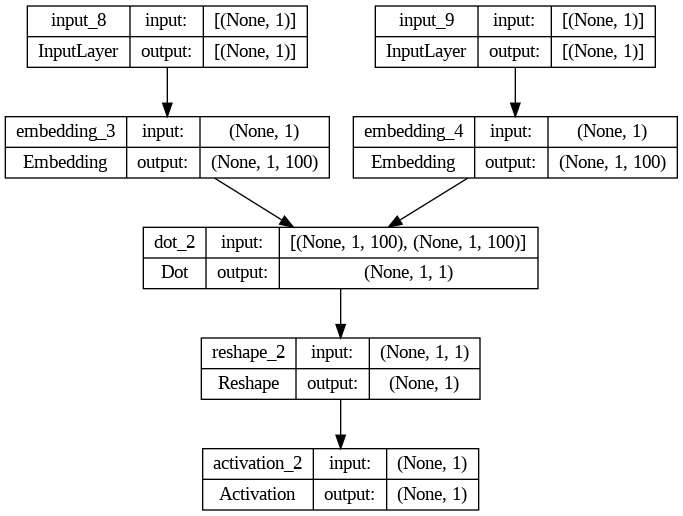

In [142]:
dot_product=Dot(axes=2)([word_embedding, context_embedding]) #룩업된 중심단어와 주변단어들의 내적곱을 해준다.
dot_product=Reshape((1,),input_shape=(1,1))(dot_product) #중심단어 임베딩 층과 주변단어 임베딩 층과 같도록(1,1) 형태로 들어온 dot_product를 (1,)로 reshape 해준다.
output=Activation('sigmoid')(dot_product) # 0,1 이진분류이므로 로지스틱회귀를 위한 sigmoid함수를 사용한다.

model=Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy')
plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True, rankdir='TB')

In [143]:
#모델 학습 5회
for epoch in range(1,6):
    loss=0
    for _, elem in enumerate(skip_grams):
      first_elem=np.array(list(zip(*elem[0]))[0], dtype='int32') #입력 단어 중 중심 단어
      second_elem=np.array(list(zip(*elem[0]))[1], dtype='int32') #입력 단어 중 주변 단어
      labels=np.array(elem[1], dtype='int32') #라벨
      X=[first_elem, second_elem]
      y=labels
      loss+=model.train_on_batch(X,y) #train_on_batch는 fit과는 다르게 pre_trained모델(이미 배포된 모델)을 바로바로 학습데이터셋을 학습시킬 수 있다. 일반적으로fit사용
    print('Epoch : ', epoch, loss)


KeyboardInterrupt: ignored

In [ ]:
import gensim

f=open('vectors.txt', 'w') #쓰기용으로 파일 오픈
f.write('{} {}\n'.format(vocab_size-1, embed_size))#
vectors=model.get_weights()[0]
for word, i in tokenizer.word_index.items():
  f.write('{} {}\n'.fotmat(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

#모델 로드
w2v=gensim.model.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)